# Behaviour analysis of bonsai VR

In [455]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [443]:
mouse_id = "009"
date = "20251029"
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-009/ses-4LM017_date-20251029T113300


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [444]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [445]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)

Sanity check:

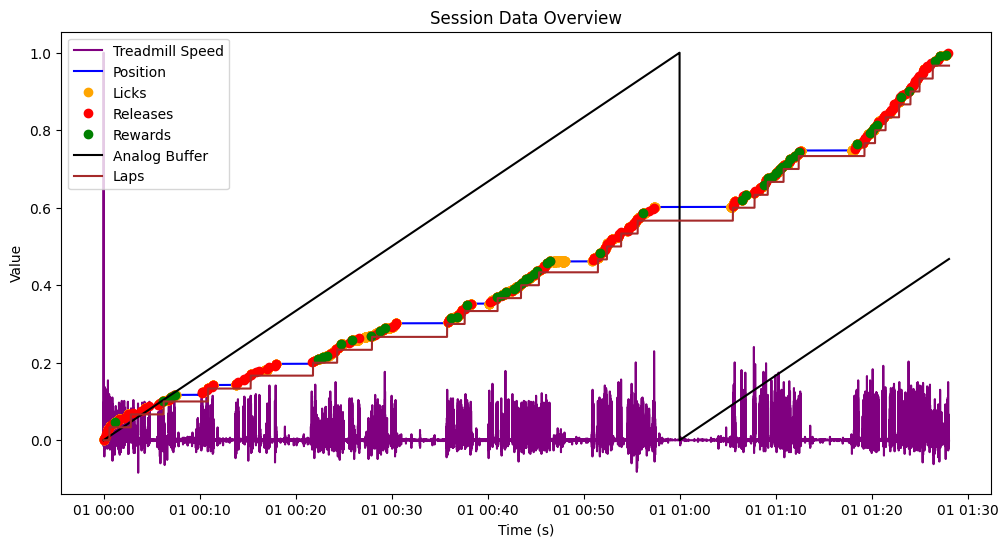

In [446]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [447]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

Session Summary:
Total Licks: 4860
Total Landmarks: 239
Total Rewards: 51
Hit Rate: 72.22%, False Alarm Rate: 16.95%, D-prime: 1.11
Targets Licked: 130 of 180, Distractors Licked: 10 of 59
rewarded odours: ['odour11' 'odour18' 'odour19'], rewarded textures: ['grass' 'light_squares' 'waves']
non-rewarded odours: ['odour6'], non-rewarded textures: ['grating1']


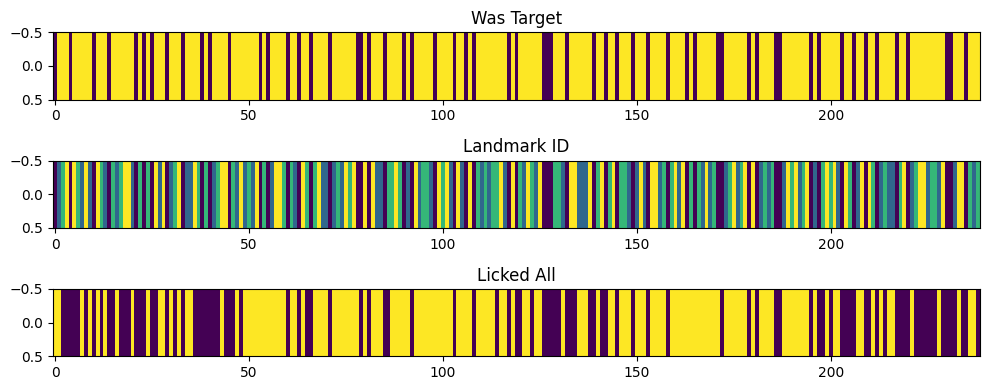

In [448]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

## 2LM and 3LM training stages

/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:704: RuntimeWarning: invalid value encountered in scalar divide
  hit_rate_window[i] = np.sum(licked_all[i:i+window][was_target[i:i+window]==1])/all_window_goals


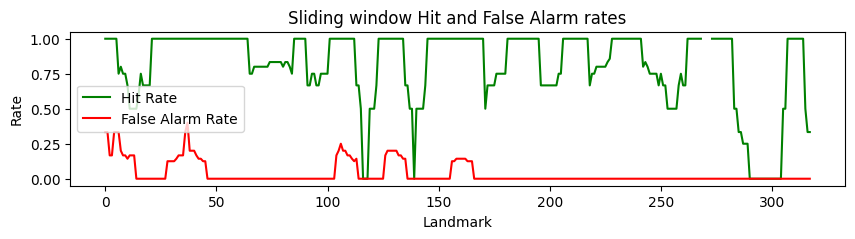

In [301]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Random world plots
For ABC sequencing for now

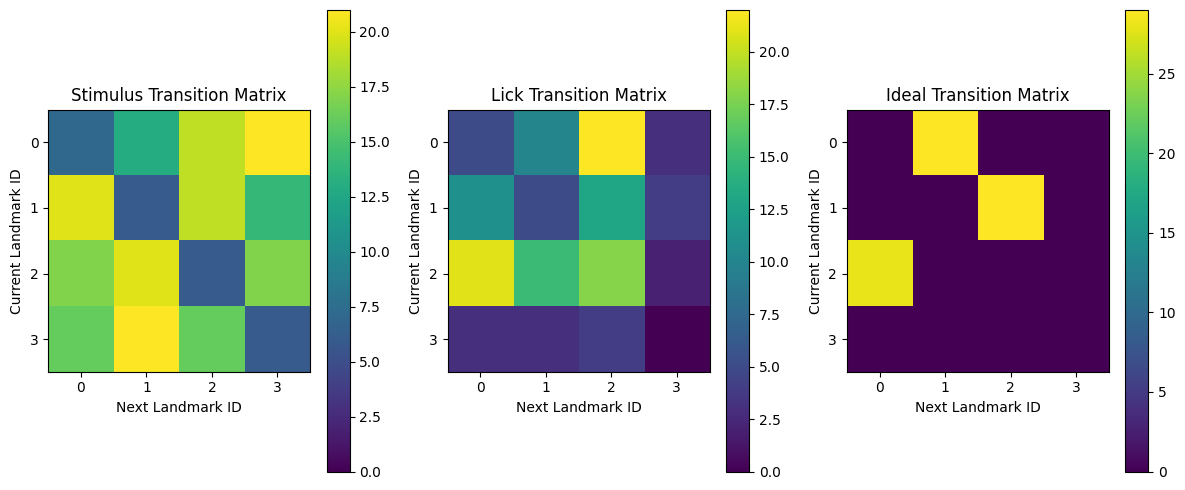

In [449]:
parse_bonsai_functions.plot_transition_matrix(sess_dataframe,ses_settings)

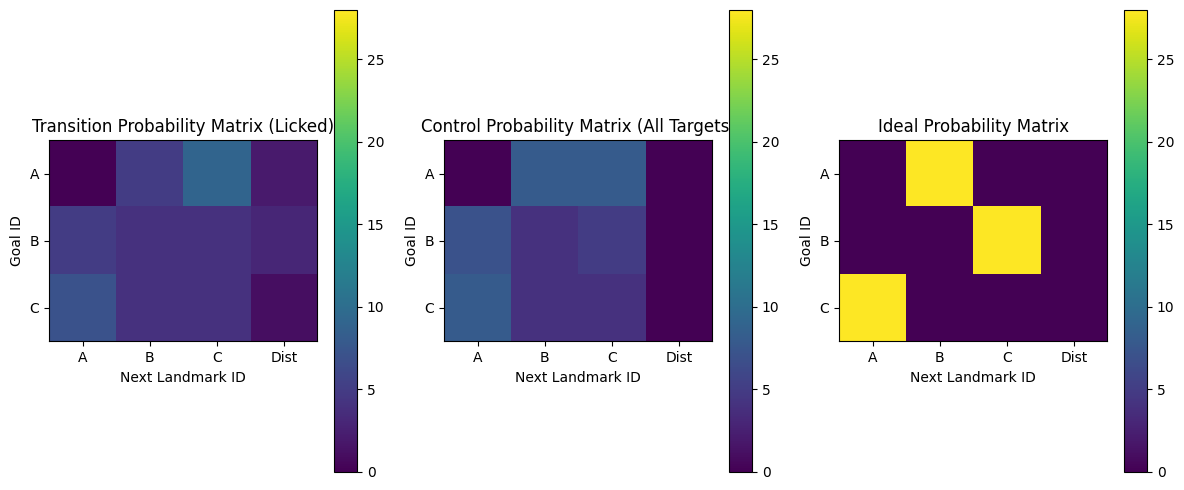

In [451]:
parse_bonsai_functions.plot_conditional_matrix(sess_dataframe,ses_settings)

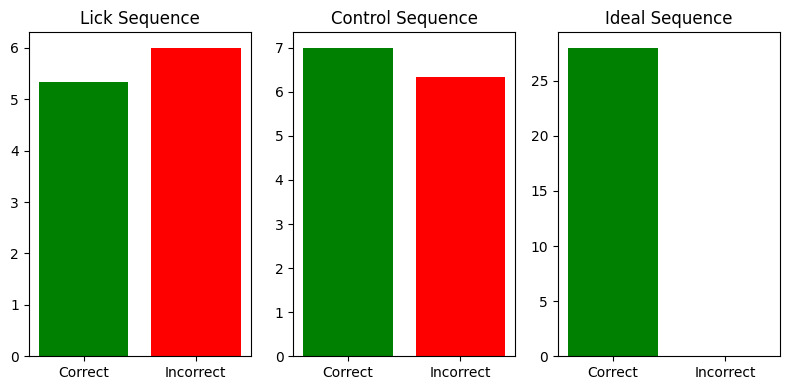

In [452]:
parse_bonsai_functions.plot_sequencing_ABC(sess_dataframe,ses_settings)

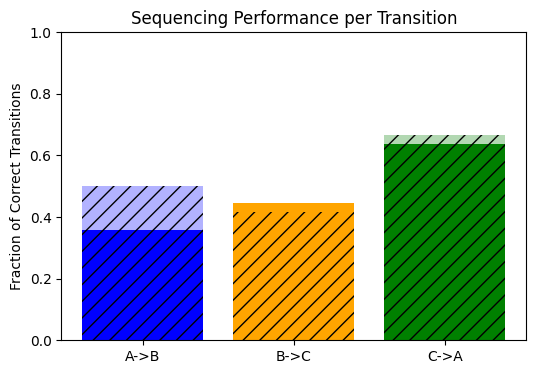

Sequencing Performance: 47.93%
Control Performance: 52.78%


0.47931697931697936

In [456]:
parse_bonsai_functions.plot_seq_fraction(sess_dataframe,ses_settings,test='control') 
# test can be 'transition' (actual performance) or 'control' (licked at all targets) or 'ideal' (licked perfectly in sequence)

## Stable world plots

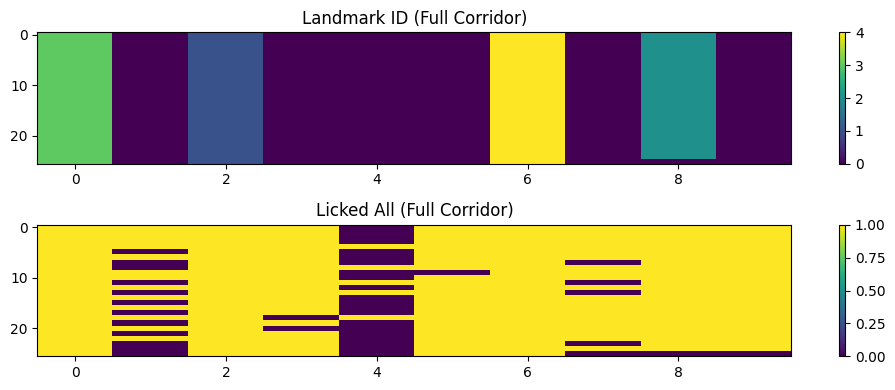

In [424]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)

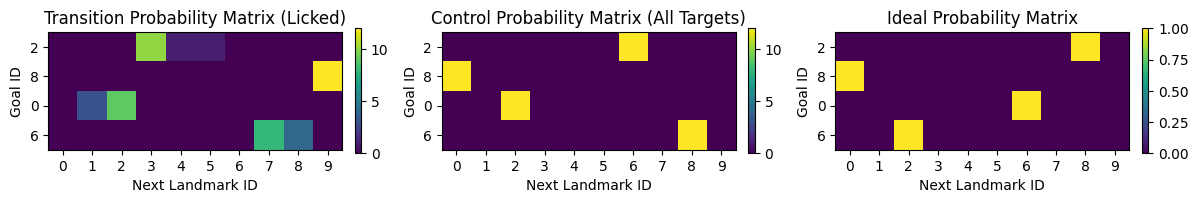

In [425]:
parse_bonsai_functions.plot_stable_conditional_matrix(sess_dataframe,ses_settings)

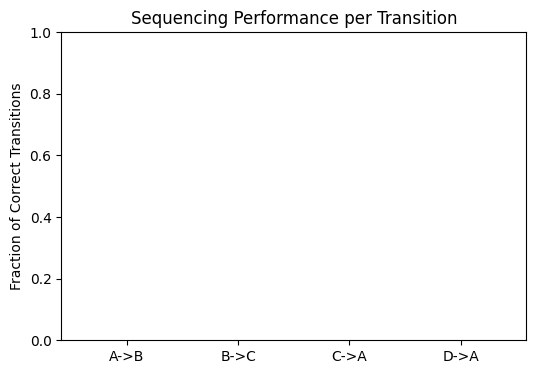

Sequencing Performance: 0.00%


(0.0, 0.0, 0.0, 0.0, 0.0)

In [426]:
parse_bonsai_functions.calc_stable_seq_fraction(sess_dataframe,ses_settings,test='transition')

In [ ]:
position binned speed per lap, separated by lap identity